# NLP formulation Above Pinch Point

In [ ]:
from pyomo.environ import *
from pyomo.opt import SolverFactory

In [ ]:
m = ConcreteModel()

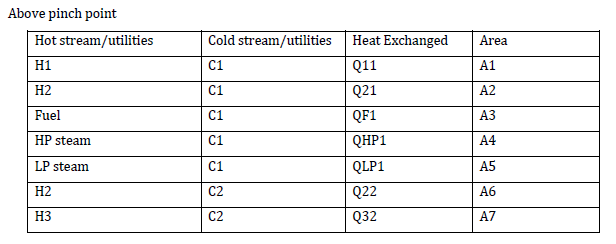

In [ ]:
# Define variable names and domains
A_vars = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7']
F_vars = [f'F{i}' for i in range(1, 54) if i not in [9, 10]]  
Q_vars = ['Q11', 'Q21', 'QF1', 'QHP1', 'QLP1', 'Q22', 'Q32']
T_vars = ['T3', 'T4', 'T5', 'T6', 'T21', 'T22', 'T23', 'T24', 'T25', 'T48', 'T49', 'T50', 'T51', 'T16', 'T17', 'T18', 'T19', 'T20']

In [ ]:
# Create variables
for var in A_vars + F_vars + Q_vars + T_vars:
    m.add_component(var, Var(domain=NonNegativeReals))

In [ ]:
# Define Constraints
m.con1 = Constraint(expr = m.F1 + (m.F2)== 40) 
m.con2 = Constraint(expr = m.F11 + (m.F12) + m.F13 + m.F14 + m.F15 == 50)
m.con3 = Constraint(expr = m.F46 + (m.F47)== 180)
m.con4 = Constraint(expr = m.F1 + (m.F8)== m.F3)
m.con5 = Constraint(expr = m.F7 + (m.F2)== m.F4)
m.con6 = Constraint(expr = m.F11 + m.F30 + m.F34 + m.F38 + m.F42 == m.F16)
m.con7 = Constraint(expr = m.F12 + m.F26 + m.F35 + m.F39 + m.F43 == m.F17)
m.con8 = Constraint(expr = m.F13 + m.F27 + m.F31 + m.F40 + m.F44 == m.F18)
m.con9 = Constraint(expr = m.F14 + m.F28 + m.F32 + m.F36 + m.F45 == m.F19)
m.con10 = Constraint(expr = m.F15 + m.F29 + m.F33 + m.F37 + m.F41 == m.F20)
m.con11 = Constraint(expr = m.F46 + (m.F52)== m.F48)
m.con12 = Constraint(expr = m.F47 + (m.F53)== m.F49)
m.con13 = Constraint(expr = 600*m.F1 + m.F8*m.T6 == m.F3*m.T3)
m.con14 = Constraint(expr = 600*m.F2 + m.F7*m.T5 == m.F4*m.T4)
m.con15 = Constraint(expr = 350*m.F11 + m.F30*m.T22 + m.F34*m.T23 + m.F38*m.T24 + m.F42*m.T25 == m.F16*m.T16)
m.con16 = Constraint(expr = 350*m.F12 + m.F26*m.T21 + m.F35*m.T23 + m.F39*m.T24 + m.F43*m.T25 == m.F17*m.T17)
m.con17 = Constraint(expr = 350*m.F13 + m.F27*m.T21 + m.F31*m.T22 + m.F40*m.T24 + m.F44*m.T25 == m.F18*m.T18)
m.con18 = Constraint(expr = 350*m.F14 + m.F28*m.T21 + m.F32*m.T22 + m.F36*m.T23 + m.F45*m.T25 == m.F19*m.T19)
m.con19 = Constraint(expr = 350*m.F15 + m.F29*m.T21 + m.F33*m.T22 + m.F37*m.T23 + m.F41*m.T24 == m.F20*m.T20)
m.con20 = Constraint(expr = 340*m.F46 + m.F52*m.T51 == m.F48*m.T48)
m.con21 = Constraint(expr = 340*m.F47 + m.F53*m.T50 == m.F49*m.T49)
m.con22 = Constraint(expr = m.F5 + m.F7 == m.F3)
m.con23 = Constraint(expr = m.F6 + m.F8 == m.F4)
m.con24 = Constraint(expr = m.F21 + m.F26 + m.F27 + m.F28 + m.F29 == m.F16)
m.con25 = Constraint(expr = m.F22 + m.F30 + m.F31 + m.F32 + m.F33 == m.F17)
m.con26 = Constraint(expr = m.F23 + m.F34 + m.F35 + m.F36 + m.F37 == m.F18)
m.con27 = Constraint(expr = m.F24 + m.F38 + m.F39 + m.F40 + m.F41 == m.F19)
m.con28 = Constraint(expr = m.F25 + m.F42 + m.F43 + m.F44 + m.F45 == m.F20)
m.con29 = Constraint(expr = m.F50 + m.F53 == m.F48)
m.con30 = Constraint(expr = m.F51 + m.F52 == m.F49)
m.con31 = Constraint(expr = m.Q11 == 20*(700-420))
m.con32 = Constraint(expr = m.Q32 == 70*(460-360))
m.con33 = Constraint(expr = m.QF1 == 5.38*(750-360))
m.con34 = Constraint(expr = m.QHP1 == 6.67*(510-360))
m.con35 = Constraint(expr = m.QLP1 == 10*(410-360))
m.con36 = Constraint(expr = m.F3*(m.T3-m.T5) == m.Q21)
m.con37 = Constraint(expr = m.F4*(m.T4-m.T6) == m.Q22)
m.con38 = Constraint(expr = -m.F16*(m.T16-m.T21) == m.Q11)
m.con39 = Constraint(expr = -m.F17*(m.T17-m.T22) == m.Q21)
m.con40 = Constraint(expr = -m.F18*(m.T18-m.T23) == m.QF1)
m.con41 = Constraint(expr = -m.F19*(m.T19-m.T24) == m.QHP1)
m.con42 = Constraint(expr = -m.F20*(m.T20-m.T25) == m.QLP1)
m.con43 = Constraint(expr = -m.F48*(m.T48-m.T50) == m.Q22)
m.con44 = Constraint(expr = -m.F49*(m.T49-m.T51) == m.Q32)
m.con45 = Constraint(expr = m.F5 + m.F6 == 40)
m.con46 = Constraint(expr = m.F21 + m.F22 + m.F23 + m.F24 + m.F25 == 50)
m.con47 = Constraint(expr = m.F50 + m.F51 == 180)
m.con48 = Constraint(expr = m.F5*m.T5 + m.F6*m.T6 == 14400)
m.con49 = Constraint(expr = m.F21*m.T21 + m.F22*m.T22 + m.F23*m.T23 + m.F24*m.T24 + m.F25*m.T25 == 32500 )
m.con50 = Constraint(expr = m.F50*m.T50 + m.F51*m.T51 == 72000)
m.con51 = Constraint(expr = m.A1*(((700-m.T21)*(420-m.T16)*(((700-m.T21)+(420-m.T16))/2))**(1/3)) == m.Q11)
m.con52 = Constraint(expr = m.A2*(((m.T3-m.T22)*(m.T5-m.T17)*(((m.T3-m.T22)+(m.T5-m.T17))/2))**(1/3)) == m.Q21)
m.con53 = Constraint(expr = m.A3*(((750-m.T23)*(360-m.T18)*(((750-m.T23)+(360-m.T18))/2))**(1/3)) == m.QF1)
m.con54 = Constraint(expr = m.A4*(((510-m.T24)*(360-m.T19)*(((510-m.T24)+(360-m.T19))/2))**(1/3)) == m.QHP1)
m.con55 = Constraint(expr = m.A5*(((410-m.T25)*(360-m.T20)*(((410-m.T25)+(360-m.T20))/2))**(1/3)) == m.QLP1)
m.con56 = Constraint(expr = m.A6*(((m.T4-m.T50)*(m.T6-m.T48)*(((m.T4-m.T50)+(m.T6-m.T48))/2))**(1/3)) == m.Q22)
m.con57 = Constraint(expr = m.A7*(((460-m.T51)*(360-m.T49)*(((460-m.T51)+(360-m.T49))/2))**(1/3)) == m.Q32)
m.con58 = Constraint(expr = 700 - m.T21 >= 20)
m.con59 = Constraint(expr = 750 - m.T23 >= 20)
m.con60 = Constraint(expr = 510 - m.T24 >= 20)
m.con61 = Constraint(expr = 410 - m.T25 >= 20)
m.con62 = Constraint(expr = 460 - m.T51 >= 20)
m.con63 = Constraint(expr = 420 - m.T16 >= 20)
m.con64 = Constraint(expr = 360 - m.T18 >= 20)
m.con65 = Constraint(expr = 360 - m.T19 >= 20)
m.con66 = Constraint(expr = 360 - m.T20 >= 20)
m.con67 = Constraint(expr = 360 - m.T49 >= 20)
m.con68 = Constraint(expr = m.T3 - m.T22 >=20)
m.con69 = Constraint(expr = m.T5 - m.T17 >=20)
m.con70 = Constraint(expr = m.T4 - m.T50 >=20)
m.con71 = Constraint(expr = m.T6 - m.T48 >=20)
m.con72 = Constraint(expr = m.T3 <= 600)
m.con73 = Constraint(expr = m.T5 - 600 <= - (m.Q21/40))
m.con74 = Constraint(expr = m.T4 <= 600)
m.con75 = Constraint(expr = m.T6 - 600 <= - (m.Q22/40))
m.con76 = Constraint(expr = m.T16 >= 350)
m.con77 = Constraint(expr = m.T17 >= 350)
m.con78 = Constraint(expr = m.T18 >= 350)
m.con79 = Constraint(expr = m.T19 >= 350)
m.con80 = Constraint(expr = m.T20 >= 350)
m.con81 = Constraint(expr = m.T21 - 350 >= (m.Q11/50))
m.con82 = Constraint(expr = m.T22 - 350 >= (m.Q21/50))
m.con83 = Constraint(expr = m.T23 - 350 >= (m.QF1/50))
m.con84 = Constraint(expr = m.T24 - 350 >= (m.QHP1/50))
m.con85 = Constraint(expr = m.T25 - 350 >= (m.QLP1/50))
m.con86 = Constraint(expr = m.T48 >= 340)
m.con87 = Constraint(expr = m.T49 >= 340)
m.con88 = Constraint(expr = m.T50 - 340 >= (m.Q22/180))
m.con89 = Constraint(expr = m.T51 - 340 >= (m.Q32/180))

In [ ]:
# Define objective function and solve using IPOPT solver
m.obj = Objective(expr = 4000*((m.A1)**0.6)+4000*((m.A2)**0.6)+4000*((m.A3)**0.6)+4000*((m.A4)**0.6)+4000*((m.A5)**0.6)+4000*((m.A6)**0.6)+4000*((m.A7)**0.6), sense=minimize)
opt = SolverFactory('ipopt', executable = "C:\\Users\\Dell\\anaconda3\\pkgs\\Ipopt-3.11.1-win64-intel13.1\\bin\\ipopt")
opt.solve(m, tee=True)

# NLP formulation Below Pinch Point

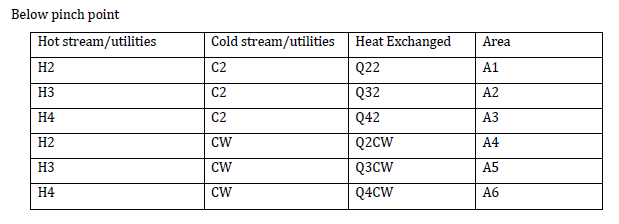

In [ ]:
# Define variable names
A_vars = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6']
F_vars = [f'F{i}' for i in range(1, 55)]
Q_vars = ['Q22', 'Q32', 'Q42', 'Q2CW', 'Q3CW', 'Q4CW']
T_values = [3, 4, 5, 6, 11, 12, 13, 14, 19, 20, 21, 22, 28, 29, 30, 31, 32, 33, 43, 44, 45, 46, 47, 48]
T_vars = [f'T{i}' for i in T_values]

In [ ]:
# Define Constraints
m.con1 = Constraint(expr = m.F1 + (m.F2)== 40)
m.con2 = Constraint(expr = m.F9 + (m.F10)== 70)
m.con3 = Constraint(expr = m.F17 + (m.F18)== 94)
m.con4 = Constraint(expr = m.F25 + (m.F26) + m.F27  == 180)
m.con5 = Constraint(expr = m.F40 + (m.F41) + m.F42 == 60)
m.con6 = Constraint(expr = m.F1 + (m.F8)== m.F3)
m.con7 = Constraint(expr = m.F7 + (m.F2)== m.F4)
m.con8 = Constraint(expr = m.F9 + (m.F16)== m.F11)
m.con9 = Constraint(expr = m.F10 + (m.F15)== m.F12)
m.con10 = Constraint(expr = m.F17 + (m.F24)== m.F19)
m.con11 = Constraint(expr = m.F18 + (m.F23)== m.F20)
m.con12 = Constraint(expr = m.F25 + m.F38 + m.F36 == m.F28)
m.con13 = Constraint(expr = m.F26 + m.F34 + m.F39 == m.F29)
m.con14 = Constraint(expr = m.F27 + m.F35 + m.F37 == m.F30)
m.con15 = Constraint(expr = m.F40 + m.F51 + m.F53 == m.F43)
m.con16 = Constraint(expr = m.F41 + m.F49 + m.F54 == m.F44)
m.con17 = Constraint(expr = m.F42 + m.F50 + m.F52 == m.F45)
m.con18 = Constraint(expr = 360*m.F1 + m.F8*m.T6 == m.F3*m.T3)
m.con19 = Constraint(expr = 360*m.F2 + m.F7*m.T5 == m.F4*m.T4)
m.con20 = Constraint(expr = 360*m.F9 + m.F16*m.T14 == m.F11*m.T11)
m.con21 = Constraint(expr = 360*m.F10 + m.F15*m.T13 == m.F12*m.T12)
m.con22 = Constraint(expr = 360*m.F17 + m.F24*m.T22 == m.F19*m.T19)
m.con23 = Constraint(expr = 360*m.F18 + m.F23*m.T21 == m.F20*m.T20)
m.con24 = Constraint(expr = 300*m.F25 + m.F38*m.T33 + m.F36*m.T32 == m.F28*m.T28)
m.con25 = Constraint(expr = 300*m.F26 + m.F34*m.T31 + m.F39*m.T33 == m.F29*m.T29)
m.con26 = Constraint(expr = 300*m.F27 + m.F35*m.T31 + m.F37*m.T32 == m.F30*m.T30)
m.con27 = Constraint(expr = 290*m.F40 + m.F51*m.T47 + m.F53*m.T48 == m.F43*m.T43)
m.con28 = Constraint(expr = 290*m.F41 + m.F49*m.T46 + m.F54*m.T48 == m.F44*m.T44)
m.con29 = Constraint(expr = 290*m.F42 + m.F50*m.T46 + m.F52*m.T47 == m.F45*m.T45)
m.con30 = Constraint(expr = m.F5 + m.F7 == m.F3)
m.con31 = Constraint(expr = m.F6 + m.F8 == m.F4)
m.con32 = Constraint(expr = m.F13 + m.F15 == m.F11)
m.con33 = Constraint(expr = m.F14 + m.F16 == m.F12)
m.con34 = Constraint(expr = m.F21 + m.F23 == m.F19)
m.con35 = Constraint(expr = m.F22 + m.F24 == m.F20)
m.con36 = Constraint(expr = m.F31 + m.F34 + m.F35 == m.F28)
m.con37 = Constraint(expr = m.F32 + m.F36 + m.F37 == m.F29)
m.con38 = Constraint(expr = m.F33 + m.F38 + m.F39 == m.F30)
m.con39 = Constraint(expr = m.F46 + m.F49 + m.F50 == m.F43)
m.con40 = Constraint(expr = m.F47 + m.F51 + m.F52 == m.F44)
m.con41 = Constraint(expr = m.F48 + m.F53 + m.F54 == m.F45)
m.con42 = Constraint(expr = m.F3*(m.T3-m.T5) == m.Q22)
m.con43 = Constraint(expr = m.F4*(m.T4-m.T6) == m.Q2CW)
m.con44 = Constraint(expr = m.F11*(m.T11-m.T13) == m.Q32)
m.con45 = Constraint(expr = m.F12*(m.T12-m.T14) == m.Q3CW)
m.con46 = Constraint(expr = m.F19*(m.T19-m.T21) == m.Q42)
m.con47 = Constraint(expr = m.F20*(m.T20-m.T22) == m.Q4CW)
m.con48 = Constraint(expr = -m.F28*(m.T28-m.T31) == m.Q22)
m.con49 = Constraint(expr = -m.F29*(m.T29-m.T32) == m.Q32)
m.con50 = Constraint(expr = -m.F30*(m.T30-m.T33) == m.Q42)
m.con51 = Constraint(expr = -m.F43*(m.T43-m.T46) == m.Q2CW)
m.con52 = Constraint(expr = -m.F44*(m.T44-m.T47) == m.Q3CW)
m.con53 = Constraint(expr = -m.F45*(m.T45-m.T48) == m.Q4CW)
m.con54 = Constraint(expr = m.F5 + m.F6 == 40)
m.con55 = Constraint(expr = m.F13 + m.F14 == 70)
m.con56 = Constraint(expr = m.F21 + m.F22 == 94)
m.con57 = Constraint(expr = m.F31 + m.F32 + m.F33 == 180)
m.con58 = Constraint(expr = m.F46 + m.F47 + m.F48 == 60)
m.con59 = Constraint(expr = m.F5*m.T5 + m.F6*m.T6 == 14400)
m.con60 = Constraint(expr = m.F13*m.T13 + m.F14*m.T14 == 25200)
m.con61 = Constraint(expr = m.F21*m.T21 + m.F22*m.T22 == 33840)
m.con62 = Constraint(expr = m.F31*m.T31 + m.F32*m.T32 + m.F33*m.T33 == 54000 )
m.con63 = Constraint(expr = m.F46*m.T46 + m.F47*m.T47 + m.F48*m.T48 == 17400 )
m.con64 = Constraint(expr = m.A1*(((m.T3-m.T31)*(m.T5-m.T28)*(((m.T3-m.T31)+(m.T5-m.T28))/2))**(1/3)) == m.Q22)
m.con65 = Constraint(expr = m.A2*(((m.T11-m.T32)*(m.T13-m.T29)*(((m.T11-m.T32)+(m.T13-m.T29))/2))**(1/3)) == m.Q32)
m.con66 = Constraint(expr = m.A3*(((m.T19-m.T33)*(m.T21-m.T30)*(((m.T19-m.T33)+(m.T21-m.T30))/2))**(1/3)) == m.Q42)
m.con67 = Constraint(expr = m.A4*(((m.T4-m.T46)*(m.T6-m.T43)*(((m.T4-m.T46)+(m.T6-m.T43))/2))**(1/3)) == m.Q2CW)
m.con68 = Constraint(expr = m.A5*(((m.T12-m.T47)*(m.T14-m.T44)*(((m.T12-m.T47)+(m.T14-m.T44))/2))**(1/3)) == m.Q3CW)
m.con69 = Constraint(expr = m.A6*(((m.T20-m.T48)*(m.T22-m.T45)*(((m.T20-m.T48)+(m.T22-m.T45))/2))**(1/3)) == m.Q4CW)
m.con70 = Constraint(expr = m.T3 - m.T31 >= 20)
m.con71 = Constraint(expr = m.T5 - m.T28 >= 20)
m.con72 = Constraint(expr = m.T4 - m.T46 >= 20)
m.con73 = Constraint(expr = m.T6 - m.T43 >= 20)
m.con74 = Constraint(expr = m.T11 - m.T32 >= 20)
m.con75 = Constraint(expr = m.T13 - m.T29 >= 20)
m.con76 = Constraint(expr = m.T12 - m.T47 >= 20)
m.con77 = Constraint(expr = m.T14 - m.T44 >= 20)
m.con78 = Constraint(expr = m.T19 - m.T33 >= 20)
m.con79 = Constraint(expr = m.T21 - m.T30 >= 20)
m.con80 = Constraint(expr = m.T20 - m.T48 >=20)
m.con81 = Constraint(expr = m.T22 - m.T45 >=20)
m.con82 = Constraint(expr = m.T3 <= 360)
m.con83 = Constraint(expr = m.T5 - 360 <= - (m.Q22/40))
m.con84 = Constraint(expr = m.T4 <= 360)
m.con85 = Constraint(expr = m.T6 - 360 <= - (m.Q2CW/40))
m.con86 = Constraint(expr = m.T11 <= 360)
m.con87 = Constraint(expr = m.T12 <= 360)
m.con88 = Constraint(expr = m.T19 <= 360)
m.con89 = Constraint(expr = m.T20 <= 360)
m.con90 = Constraint(expr = m.T13 - 360 <= (-m.Q32/70))
m.con91 = Constraint(expr = m.T14 - 360 <= (-m.Q3CW/70))
m.con92 = Constraint(expr = m.T21 - 360 <= (-m.Q42/94))
m.con93 = Constraint(expr = m.T22 - 360 <= (-m.Q4CW/94))
m.con94 = Constraint(expr = m.T28 >= 300)
m.con95 = Constraint(expr = m.T29 >= 300)
m.con96 = Constraint(expr = m.T30 >= 300)
m.con97 = Constraint(expr = m.T43 >= 300)
m.con98 = Constraint(expr = m.T44 >= 290)
m.con99 = Constraint(expr = m.T45 >= 290)
m.con100 = Constraint(expr = m.T31 - 300 >= (m.Q22/180))
m.con101 = Constraint(expr = m.T32 - 300 >= (m.Q32/180))
m.con102 = Constraint(expr = m.T33 - 300 >= (m.Q42/180))
m.con103 = Constraint(expr = m.T46 - 290 >= (m.Q2CW/60))
m.con104 = Constraint(expr = m.T47 - 290 >= (m.Q3CW/60))
m.con105 = Constraint(expr = m.T48 - 290 >= (m.Q4CW/60))

In [ ]:
# Define objective function and solve using IPOPT solver 
m.obj = Objective(expr = 4000*((m.A1)**0.6)+4000*((m.A2)**0.6)+4000*((m.A3)**0.6)+4000*((m.A4)**0.6)+4000*((m.A5)**0.6)+4000*((m.A6)**0.6), sense=minimize)
opt = SolverFactory('ipopt', executable = "C:\\Users\\Dell\\anaconda3\\pkgs\\Ipopt-3.11.1-win64-intel13.1\\bin\\ipopt")
opt.solve(m, tee=True)